In [3]:
print("Aim:Implement a Customer Segmentation using K-Means Clustering\nName:Aarti Kiran Salunkhe\nUIN:221P047\nRoll no:28\n")

Aim:Implement a Customer Segmentation using K-Means Clustering
Name:Aarti Kiran Salunkhe
UIN:221P047
Roll no:28



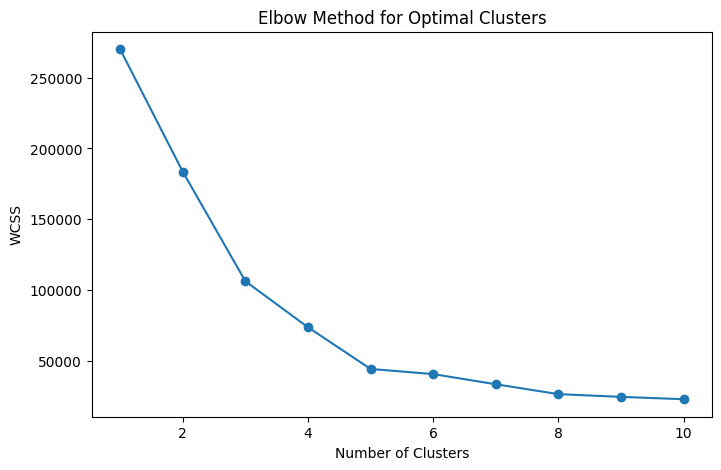

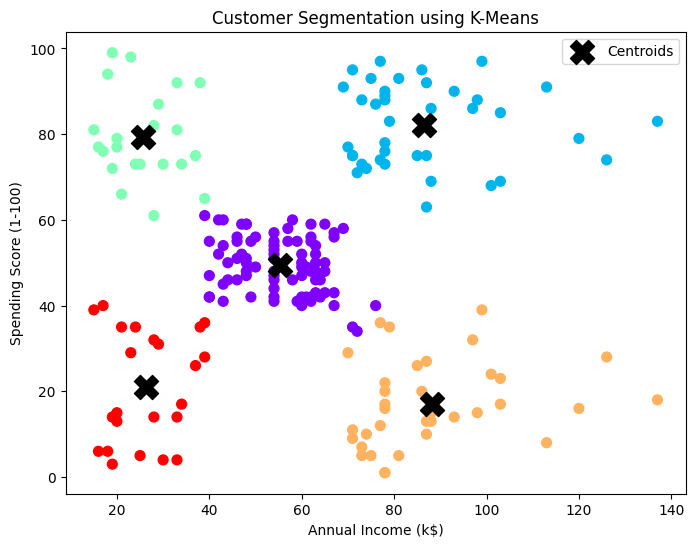

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
5        2  
6        4  
7        2  
8        4  
9        2  


In [2]:
# Customer Segmentation using K-Means Clustering

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Step 2: Select features (Annual Income & Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Use Elbow Method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Step 4: Apply K-Means with chosen number of clusters (5 from elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 5: Add cluster labels to dataset
df['Cluster'] = y_kmeans

# Step 6: Plot the clusters
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, cmap='rainbow', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s=300, c='black', marker='X', label='Centroids')
plt.title("Customer Segmentation using K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# Step 7: Show segmented dataset
print(df.head(10))
